In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("erogluegemen/airline-passengers")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Administrator\.cache\kagglehub\datasets\erogluegemen\airline-passengers\versions\1


In [2]:
import pandas as pd
df = pd.read_csv("C:/Users/Administrator/Desktop/airline_passengers.csv")
df

,month,total_passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [3]:
ts = pd.DataFrame(df) #ts=time series
ts['month'] = pd.to_datetime(ts['month'])
ts.set_index('month', inplace = True) #replacing to date time type
ts

,total_passengers
month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [5]:
decomposition = seasonal_decompose(ts['total_passengers'], model ='additive')
#additive is used when trends,seasonal, randomness are all independent, usually we use this
#multiplicative is used when trends,seasonal, randomness are all interdependent
#if you want to be4 this can do adf test to see if independent or not

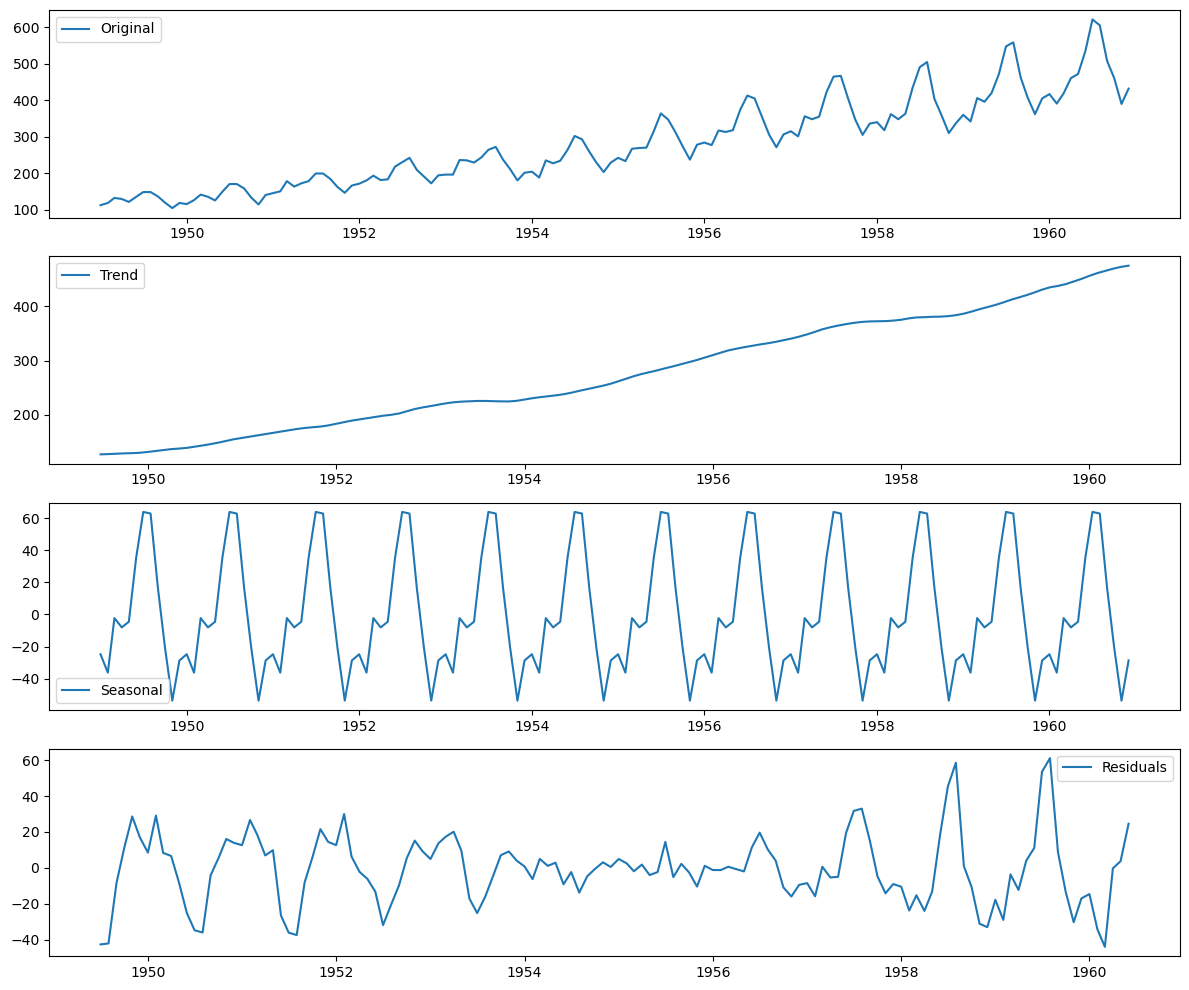

In [6]:
plt.figure(figsize = (12,10))

plt.subplot(411) #need '4' subplots in '1st' column, '1st row'
plt.plot(ts, label = 'Original') #This is the original dataset so we give it label
plt.legend(loc ='best') #Will place the legend or the label we gave in the best position

plt.subplot(412) 
plt.plot(decomposition.trend, label = 'Trend') 
plt.legend(loc ='best')

plt.subplot(413) 
plt.plot(decomposition.seasonal, label = 'Seasonal') 
plt.legend(loc ='best')

plt.subplot(414) 
plt.plot(decomposition.resid, label = 'Residuals')  #means the randomness or "the errors"
plt.legend(loc ='best')

plt.tight_layout()
plt.show()

In [7]:
#checking stationarity
from statsmodels.tsa.stattools import adfuller
#augmentment dicky fuller test
#stats>critical value -fail to reject null hypothesis
#pvalue>0.05 - fail to reject null hypothesis

In [8]:
result = adfuller(ts['total_passengers'])

print('ADF statistic value:',result[0]) #this is the first index, it will be the adf statistic value
print('p-value:',result[1])
print('Critical values:')
for key,value in result[4].items():
    print(key,value)
if result[1]<0.05:
    print('Reject the null hypothesis - the series is likely stationary.')
else:
    print('Fail to reject the null hypothesis - the series is likely non-stationary.')

ADF statistic value: 0.8153688792060597
p-value: 0.9918802434376411
Critical values:
1% -3.4816817173418295
5% -2.8840418343195267
10% -2.578770059171598
Fail to reject the null hypothesis - the series is likely non-stationary.


In [9]:
result

(0.8153688792060597,
 0.9918802434376411,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [10]:
result[1]

0.9918802434376411

In [11]:
result[4]
#This is in  dictionary this is why we used the for loop

{'1%': -3.4816817173418295,
 '5%': -2.8840418343195267,
 '10%': -2.578770059171598}

In [12]:
#differencing

In [13]:
ts_diff = ts.diff().dropna() #this will be the 1st order differencing

In [14]:
#checking if it worked
result_diff = adfuller(ts_diff['total_passengers'])

print('ADF statistic value:',result_diff[0])
print('p-value:',result_diff[1])
print('Critical values:')
for key,value in result_diff[4].items():
    print(key,value)
    
if result_diff[1]<0.05:
    print('Reject the null hypothesis - the series is likely stationary.')
else:
    print('Fail to reject the null hypothesis - the series is likely non-stationary.')

ADF statistic value: -2.829266824169992
p-value: 0.0542132902838265
Critical values:
1% -3.4816817173418295
5% -2.8840418343195267
10% -2.578770059171598
Fail to reject the null hypothesis - the series is likely non-stationary.


In [15]:
#second order differencing
ts_diff1 = ts.diff().diff().dropna()

In [16]:
result_diff1 = adfuller(ts_diff1['total_passengers'])

print('ADF statistic value:',result_diff1[0])
print('p-value:',result_diff1[1])
print('Critical values:')
for key,value in result_diff1[4].items():
    print(key,value)
    
if result_diff1[1]<0.05:
    print('Reject the null hypothesis - the series is likely stationary.')
else:
    print('Fail to reject the null hypothesis - the series is likely non-stationary.')

ADF statistic value: -16.384231542468527
p-value: 2.732891850014085e-29
Critical values:
1% -3.4816817173418295
5% -2.8840418343195267
10% -2.578770059171598
Reject the null hypothesis - the series is likely stationary.


In [17]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

<Figure size 1000x800 with 0 Axes>

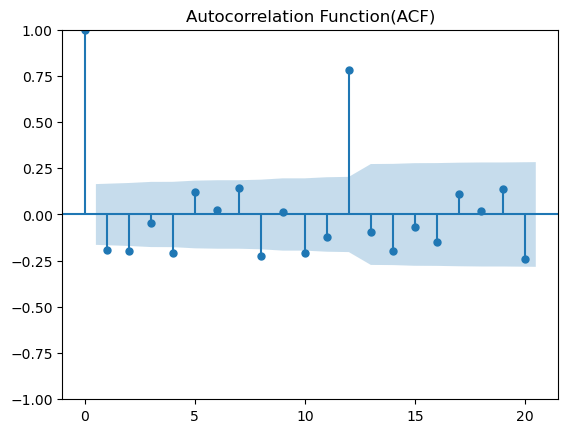

<Figure size 1000x800 with 0 Axes>

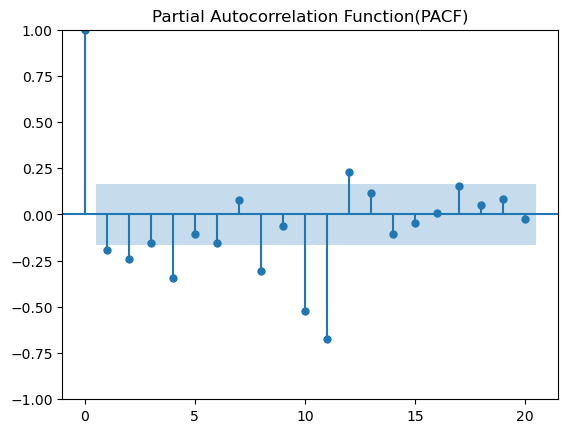

In [18]:
plt.figure(figsize = (10,8))
plot_acf(ts_diff1, lags=20)
plt.title('Autocorrelation Function(ACF)')
plt.show()

plt.figure(figsize = (10,8))
plot_pacf(ts_diff1, lags=20)
plt.title('Partial Autocorrelation Function(PACF)')
plt.show()


In [19]:
from statsmodels.tsa.arima.model import ARIMA

In [21]:
#(p,d,q)
order = (1,2,1) #here AR,MA we got from the plot as 1(1st high peak) d is 2 because we are using 2nd order differencing

model = ARIMA(ts_diff1, order = order)

model_fit = model.fit()

print(model_fit.summary())

C:\Users\Administrator\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Administrator\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Administrator\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:       total_passengers   No. Observations:                  142
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -757.987
Date:                Fri, 20 Dec 2024   AIC                           1521.974
Time:                        13:52:02   BIC                           1530.799
Sample:                    03-01-1949   HQIC                          1525.560
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4913      0.084     -5.857      0.000      -0.656      -0.327
ma.L1         -0.9998      8.367     -0.120      0.905     -17.398      15.398
sigma2      2829.4155   2.38e+04      0.119      0.9

AIC - Alkaline information , to measure if model is working good or not
we gor AIC gave 1000 it is best to have between 1 to 7 so our model is already isn't that good

"""
AR model
model = ARIMA(ts_diff1, ordeer =(1,0,0) ) WIll only work w correlation that is autoregression and so on
you can customize
"""

In [24]:
forecast_steps =30 #how many future values we need 
forecast_result = model_fit.forecast(steps = forecast_steps)
forecast = forecast_result

In [25]:
forecast_inverted = []
last_value = ts['total_passengers'].iloc[-1] #it will be in the last index , the last value
for i in range(forecast_steps):
    inverted = last_value + forecast[i]
    forecast_inverted.append(inverted)
    last_value = inverted

#You are just eliminating the differencing again 

C:\Users\Administrator\AppData\Local\Temp\ipykernel_13680\1463168097.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  inverted = last_value + forecast[i]


In [30]:
forecast_df = pd.DataFrame(forecast_inverted, columns=['Forecast'])

forecast_df.index = pd.date_range(start = ts.index[-1] +
                                  pd.DateOffset(days=1), periods= len(forecast_inverted),freq='M') #This makes the date column pick off from where it was left
#offset(days=1) means we will start from a day after the end date
#periods = how many we need it should be 30 
#frequency makes sure we get a monthwise data
print(forecast_df)

               Forecast
1960-12-31   478.418663
1961-01-31   558.271072
1961-02-28   622.421991
1961-03-31   695.010494
1961-04-30   764.177579
1961-05-31   835.749315
1961-06-30   906.863481
1961-07-31   978.926224
1961-08-31  1051.246735
1961-09-30  1124.164393
1961-10-31  1197.512468
1961-11-30  1271.372872
1961-12-31  1345.705363
1962-01-31  1420.529711
1962-02-28  1495.836204
1962-03-31  1571.629612
1962-04-30  1647.907592
1962-05-31  1724.671296
1962-06-30  1801.920157
1962-07-31  1879.654454
1962-08-31  1957.874049
1962-09-30  2036.579011
1962-10-31  2115.769306
1962-11-30  2195.444951
1962-12-31  2275.605937
1963-01-31  2356.252268
1963-02-28  2437.383942
1963-03-31  2519.000961
1963-04-30  2601.103324
1963-05-31  2683.691031


In [29]:
forecast_df.to_csv('forecast_data.csv', index= True)

In [31]:
forecast_df = forecast_df.rename(columns ={'Forecast' : 'total_passengers'})

combined_df = pd.concat([ts,forecast_df],ignore_index=False)

print(combined_df)

#combined_df.to_csv('combined_data.csv', index=False)

            total_passengers
1949-01-01        112.000000
1949-02-01        118.000000
1949-03-01        132.000000
1949-04-01        129.000000
1949-05-01        121.000000
...                      ...
1963-01-31       2356.252268
1963-02-28       2437.383942
1963-03-31       2519.000961
1963-04-30       2601.103324
1963-05-31       2683.691031

[174 rows x 1 columns]
